# Introduction to neural network classification with Tensorflow

In this notebook we will learn how to write neural networks for classifications

A classificatin is where we try to classify something as one thing or another.

A few types of classifications problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [44]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [45]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [46]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand. Lets visualize it!

In [47]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


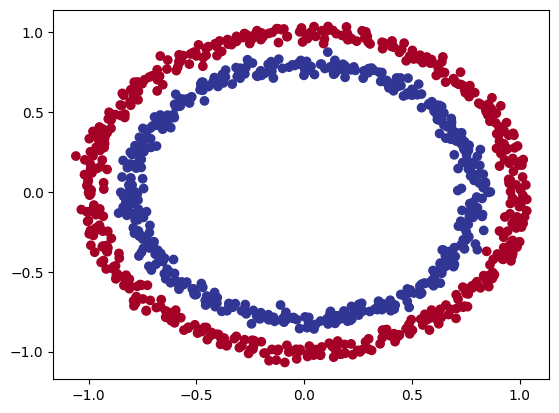

In [48]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Input and Output shapes

In [49]:
X.shape, y.shape

((1000, 2), (1000,))

In [50]:
# Hw many samples we are working with
len(X), len(y)

(1000, 1000)

In [51]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5 Tweak
6. Evaluate and so on...

In [52]:
import tensorflow as tf

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 6.2022 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 6.2102 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 5.5096 - accuracy: 0.4430
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 5.2770 - accuracy: 0.4490
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 5.1400 - accuracy: 0.4530


In [54]:
# Try and improve our model by training for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is getting around 67% accuracy... its performing as if it's guessing

So lets add an extra layer

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [56]:
# Evaluate the mode
model_2.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17344199120998383, 0.5]

Improving our model

In [57]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [58]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5110


[0.6960622668266296, 0.5109999775886536]

In [59]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


# To visualize 

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [60]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the acis boundaries of the plat and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we will make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classification


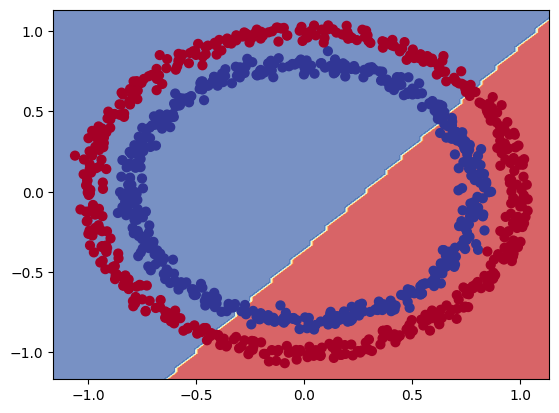

In [61]:
plot_decision_boundary(model_3, X=X, y=y)

In [62]:

# # Set random seed
# tf.random.set_seed(42)

# # Create some regression data
# X_regression = np.arange(0, 1000, 5)
# y_regression = np.arange(100, 1100, 5)

# # Split it into training and test sets
# X_reg_train = X_regression[:150]
# X_reg_test = X_regression[150:]
# y_reg_train = y_regression[:150]
# y_reg_test = y_regression[150:]

# # Fit our model to the data
# # Note: Before TensorFlow 2.7.0, this line would work
# # model_3.fit(X_reg_train, y_reg_train, epochs=100)

# # After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

In [63]:
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 543.1727 - mae: 543.1727
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 394.1884 - mae: 394.1884
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 251.6966 - mae: 251.6966
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 104.2930 - mae: 104.2930
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 69.5934 - mae: 69.5934
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 102.9695 - mae: 102.9695
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2424 - mae: 71.2424
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 46.7562 - mae: 46.7562
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 49.3504 - mae: 49.3504
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 43.4852 - mae: 43.4852
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 3ms/step


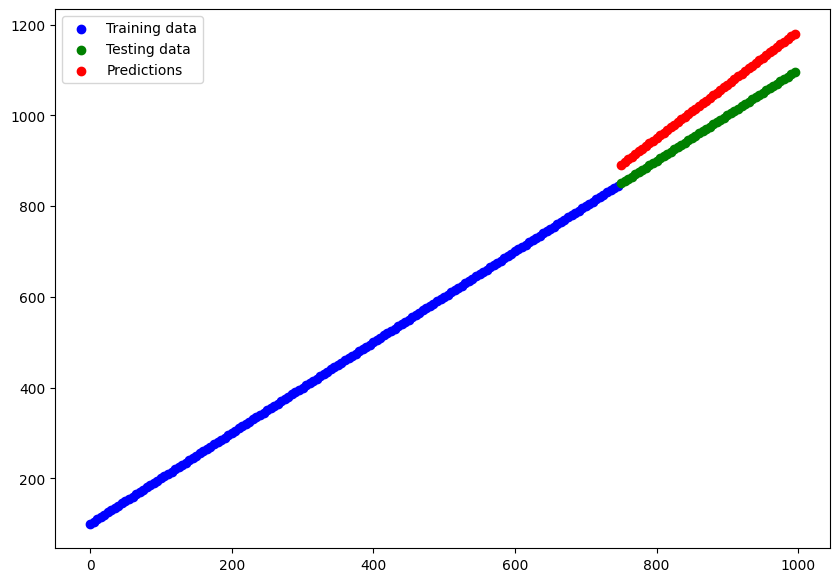

In [64]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();


The missing piece: non linearity

In [65]:
# set random seed
tf.random.set_seed(42)

# Create the modek
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile our model
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


c:\ProgramData\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 5ms/step - loss: 4.3001 - accuracy: 0.4160
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2164 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1999 - accuracy: 0.4350
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1943 - accuracy: 0.4400
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1897 - accuracy: 0.4460
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1771 - accuracy: 0.4430
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1469 - accuracy: 0.4490
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0511 - accuracy: 0.4560
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0224 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 4.0195 - accuracy: 0.4550
Epoch 11/100
32/32 [=

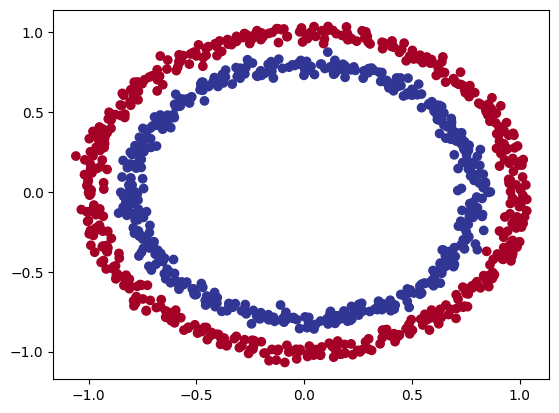

In [66]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


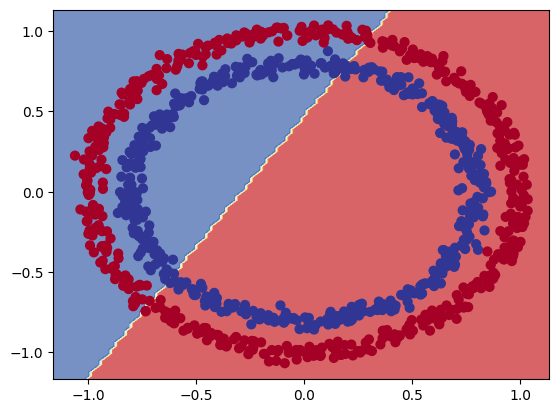

In [67]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

Trying with ReLU

In [68]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 6.2362 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 6.2301 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 6.2275 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 6.2172 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 6.2150 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 6.2059 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1853 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1866 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 6.1869 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1859 - accuracy: 0.4870
Epoch 11/

In [69]:
# Increasing the layers and neurns

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 6ms/step - loss: 0.8579 - accuracy: 0.3000
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 0.8249 - accuracy: 0.2790
Epoch 3/200
32/32 [==============================] - 0s 7ms/step - loss: 0.8059 - accuracy: 0.2550
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7946 - accuracy: 0.2420
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7854 - accuracy: 0.2180
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 0.7780 - accuracy: 0.2150
Epoch 7/200
32/32 [==============================] - 0s 8ms/step - loss: 0.7708 - accuracy: 0.2190
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 0.7658 - accuracy: 0.2170
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7605 - accuracy: 0.1920
Epoch 10/200
32/32 [==============================] - 0s 7ms/step - loss: 0.7561 - accuracy: 0.2120
Epoch 11/

In [70]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9980


[0.01684999279677868, 0.9980000257492065]

313/313 [==============================] - 1s 3ms/step
doing binary classification


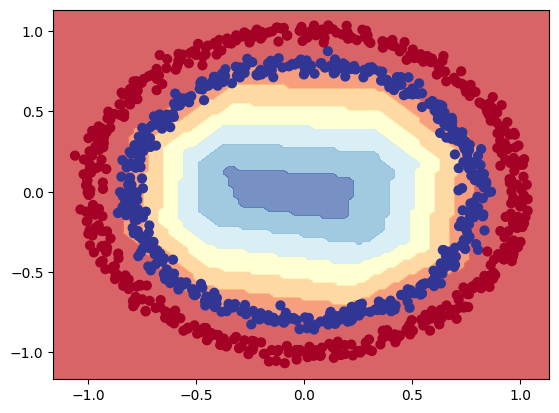

In [71]:
# How our prediction looks?
plot_decision_boundary(model_6, X, y)

In [72]:
# redoing the model with the sigmoid function
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_7.fit(X, y, epochs=170)

Epoch 1/170
32/32 [==============================] - 1s 5ms/step - loss: 0.6972 - accuracy: 0.5020
Epoch 2/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6964 - accuracy: 0.4980
Epoch 3/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6958 - accuracy: 0.4960
Epoch 4/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.4930
Epoch 5/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.4930
Epoch 6/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4840
Epoch 7/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4840
Epoch 8/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4810
Epoch 9/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.4810
Epoch 10/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4720
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


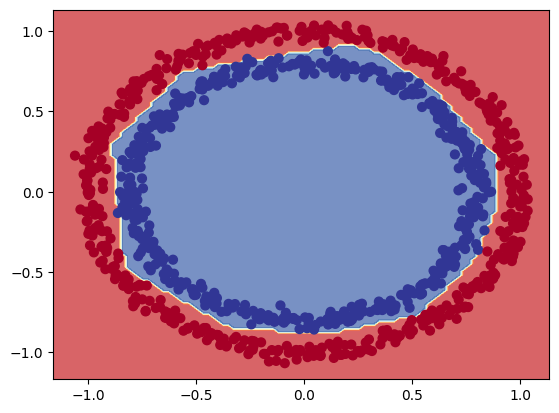

In [73]:
plot_decision_boundary(model_7, X, y)

In [74]:
#Evaluate
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.9970


[0.15525628626346588, 0.996999979019165]

In [75]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

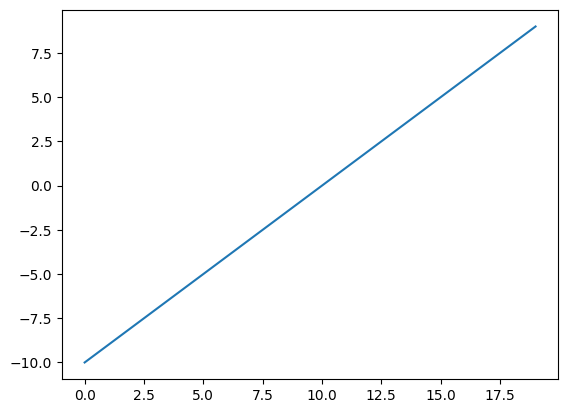

In [76]:
# Visualize our toy tensor
plt.plot(A)

In [77]:
# lets start by replicating sigmoid 
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

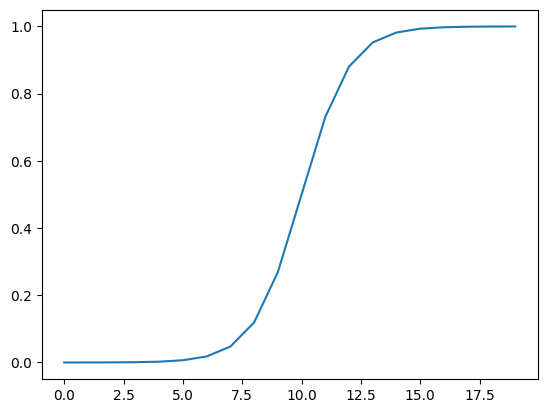

In [78]:
plt.plot(sigmoid(A))

In [79]:
# recreate ReLU 
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

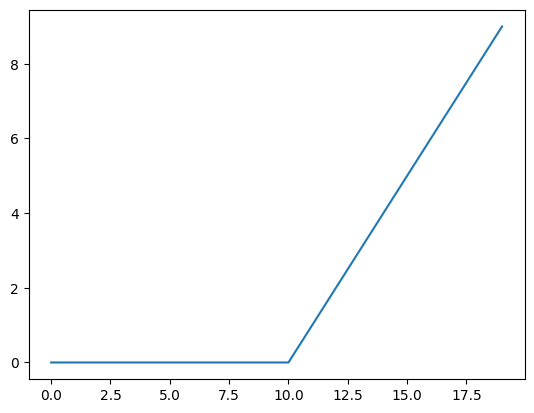

In [80]:
plt.plot(relu(A))

In [81]:
# recreating linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

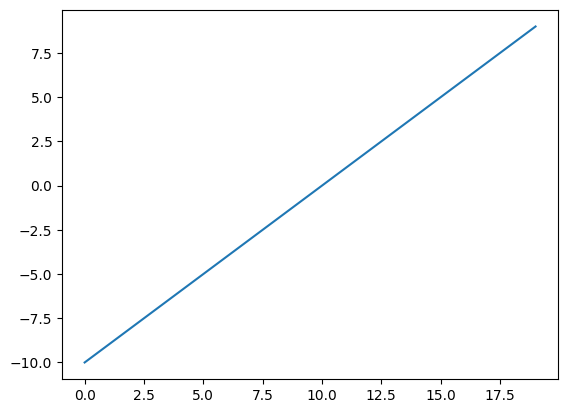

In [82]:
plt.plot(tf.keras.activations.linear(A))

Evaluating and improving our classificiation

So far we have been training and testing on the same dataset. However in ML this is a sin! 

So let's create a training and test set

In [83]:
# Check how many examples we have
len(X)

1000

In [84]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [85]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [102]:
# Let's recreate a model to fit on the trai data and evaluate on the test 

# redoing the model with the sigmoid function
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_8 = model_8.fit(X, y, epochs=170)

Epoch 1/170
32/32 [==============================] - 1s 6ms/step - loss: 0.6911 - accuracy: 0.5030
Epoch 2/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5020
Epoch 3/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5060
Epoch 4/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5110
Epoch 5/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5150
Epoch 6/170
32/32 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.5240
Epoch 7/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5240
Epoch 8/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6874 - accuracy: 0.5320
Epoch 9/170
32/32 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.5390
Epoch 10/170
32/32 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.5410
Epoch 11/

In [103]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0305 - accuracy: 1.0000


[0.03048044629395008, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


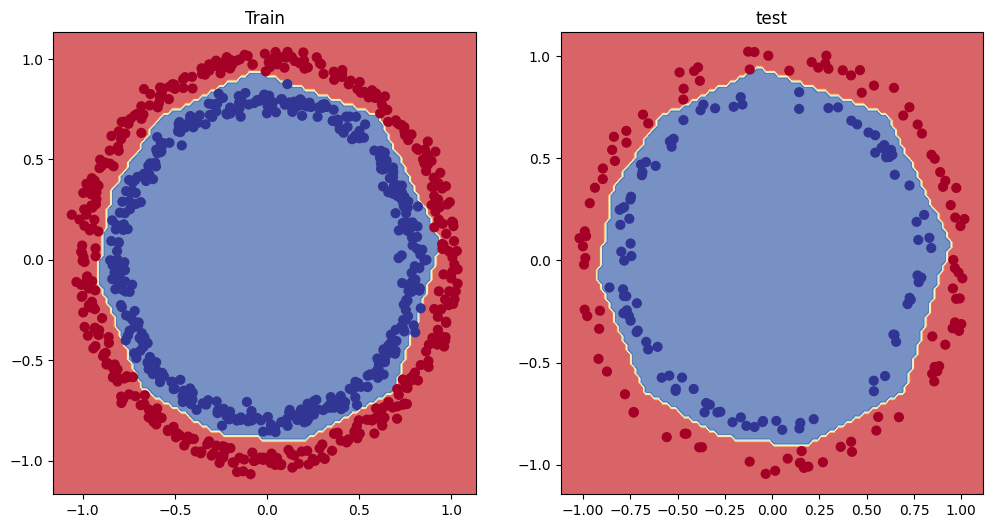

In [104]:
# Plot the decision boundaries for the tain and test set

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [105]:
# Plt the loss (training) curves

pd.DataFrame(history.history)

,loss,accuracy
0,0.692932,0.500
1,0.692504,0.516
2,0.692119,0.502
3,0.691865,0.499
4,0.691588,0.506
...,...,...
165,0.050718,0.998
166,0.049581,0.997
167,0.048772,0.999
168,0.047885,0.998


Text(0.5, 1.0, 'Model_8 loss curves')

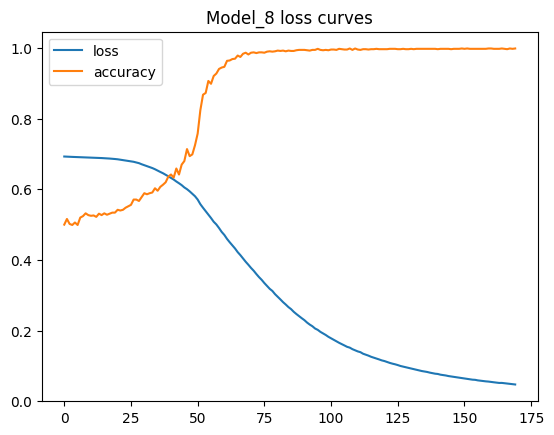

In [106]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

Finding the best learning rate

TO find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the following steps
* The learning rate **call back** : We can think if a callback as an extra piece of functionality, we can add to our **while** its training.

* Another model (we could use the same one as above, but we're practicing building models here)

* A modified loss curves plot. 

In [107]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Creating a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_schedular callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_schedular])


Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7168 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7159 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7150 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7140 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

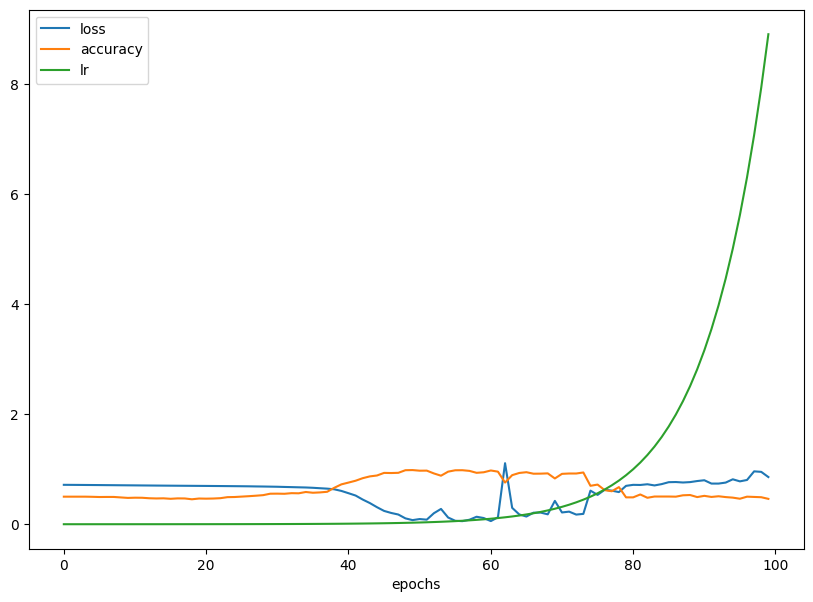

In [108]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs Loss')

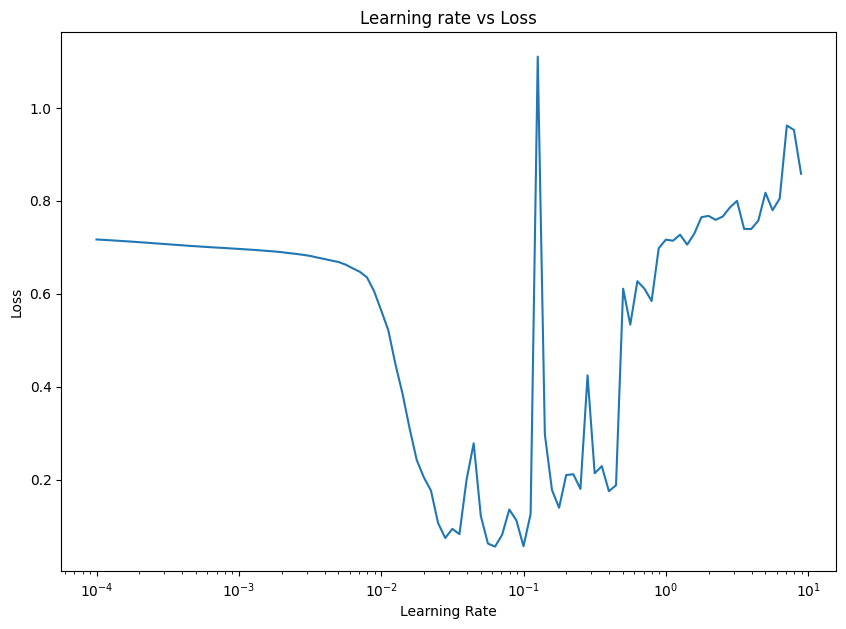

In [109]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

In [110]:
# lets try using a higher ideal learning rate with the same model

# set random seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


c:\ProgramData\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 6ms/step - loss: 0.6950 - accuracy: 0.4725
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4613
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4913
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4888
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4963
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5013
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4938
Epoch 11/20
25/25 [===========

In [111]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4950


[0.6931582689285278, 0.4950000047683716]

In [112]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 1.0000


[0.03048044629395008, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


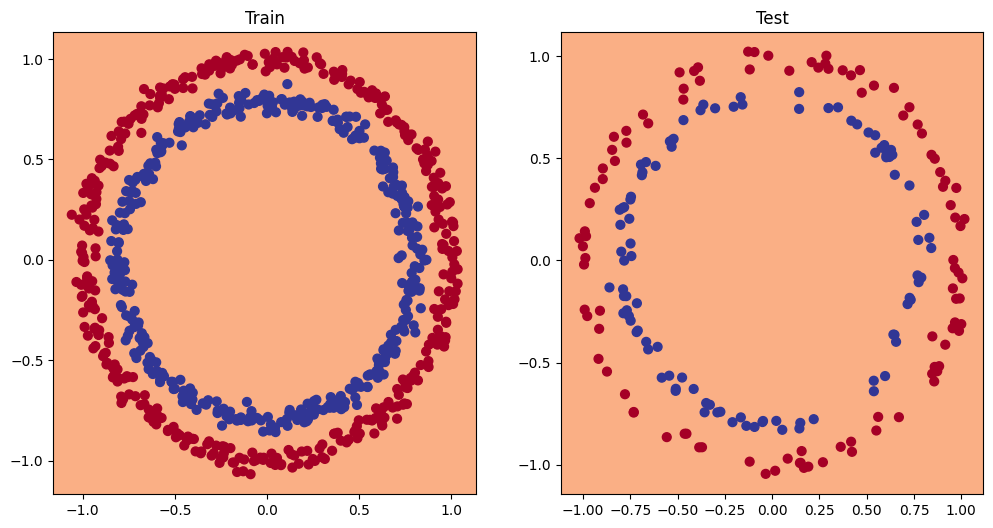

In [113]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics we should be familiar with:
* Accuracy
* Precision
* F1-score
* Confusion matrix


In [114]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4950
Model loss on the test set: 0.6931582689285278
Model accuracy on the test set: 49.50%


Confusion matrix

In [99]:
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)



7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [100]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [101]:
y_preds[:10]

array([[0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257],
       [0.5005257]], dtype=float32)

In [115]:
# Convert prediction probabilities to binary to format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [116]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[  0, 101],
       [  0,  99]], dtype=int64)

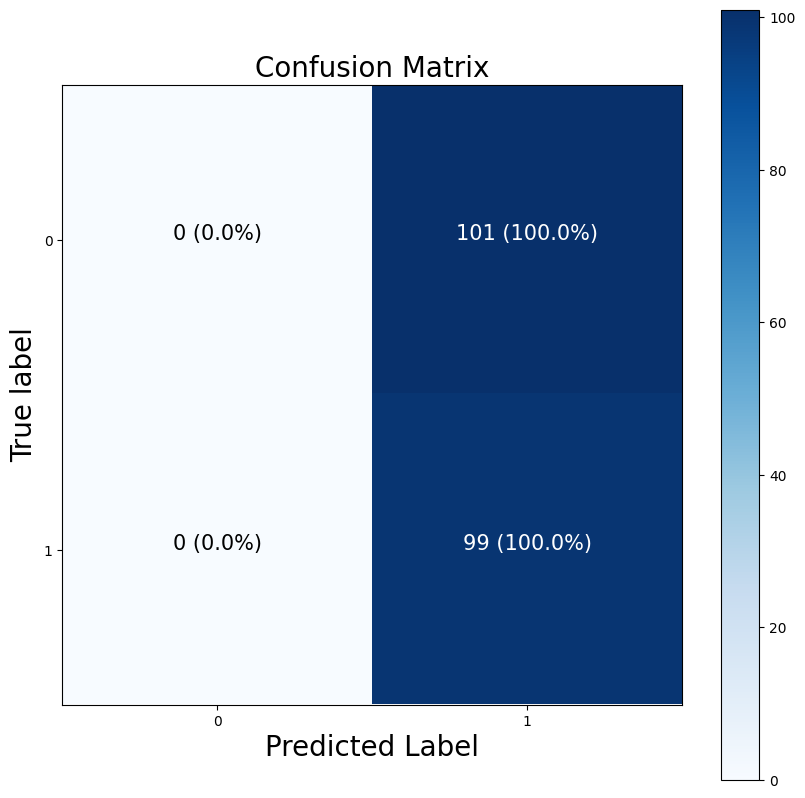

In [124]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# make it prettier
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label  size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plt the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

In [120]:
cm.shape[0]

2